In [1]:
import pymysql
import numpy as np
import pandas as pd
import random
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.basemap import Basemap
# from pyecharts.charts import Map,Geo
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib import cm
from matplotlib.colors import rgb2hex
import matplotlib.ticker as ticker

# import base64
# str=b'jiang19951015'
# y=base64.b64encode(str)
# print(y)

In [226]:
host='localhost'
user='root'  
password='jiang19951015'
database='analytics_warehouse_demo'

try:
    conn=pymysql.connect(host,user,password,database)
    print('connect successfully!')
except pymysql.Error as e:
    print('disconnect:'+str(e))

connect successfully!


In [227]:
sql='''select SUM(m.QUANTITY) as Quantity, m.PRODUCT_TYPE from 
(SELECT b.PRODUCT_TYPE,floor(a.QUANTITY) as QUANTITY FROM analytics_warehouse_demo.ORDER_ITEM_FACT a 
left join analytics_warehouse_demo.PRODUCT_DIMENSION b on a.PRODUCT_DIM_KEY=b.PRODUCT_DIM_KEY
where a.RESOLUTION_STATUS in ('Completed','Pending') and a.Quantity>=0 and truncate(a.quantity,1)= floor(a.quantity))m
group by m.PRODUCT_TYPE
order by SUM(m.QUANTITY) desc;'''
product_type=pd.read_sql(sql,con=conn)

In [374]:
# product_type

,Quantity,PRODUCT_TYPE
0,21901.0,napkins
1,16608.0,dinner plates
2,10614.0,tablecloths
3,9842.0,cereal & soup bowls
4,9353.0,coffee mugs & tea cups
5,9073.0,Unknown
6,8366.0,dinnerware
7,8139.0,placemats
8,6978.0,salad & dessert plates
9,5463.0,place settings


In [381]:
ppopular_type=pd.DataFrame(product_type,columns=['Quantity','PRODUCT_TYPE'])

# ppopular_type

,Quantity,PRODUCT_TYPE
0,21901.0,napkins
1,16608.0,dinner plates
2,10614.0,tablecloths
3,9842.0,cereal & soup bowls
4,9353.0,coffee mugs & tea cups
5,9073.0,Unknown
6,8366.0,dinnerware
7,8139.0,placemats
8,6978.0,salad & dessert plates
9,5463.0,place settings


In [382]:
new_pupular_type=ppopular_type.set_index('PRODUCT_TYPE')

new_pupular_type.index=new_pupular_type.index.str.capitalize()

top=5
top_product=new_pupular_type.head(top)
top_product
# ppopular_type.index.names=['rank']

# ppopular_type.index=ppopular_type.index+1 每执行一次都会按上一次执行结果叠加1
# ppopular_type.index = range(1,len(ppopular_type)+1)
# rank number starts from 1 
# ppopular_type.reindex(index=list(range(1,ppopular_type.shape[0])))

# ppopular_type['PRODUCT_SALES'].head(5)

,Quantity
PRODUCT_TYPE,
Napkins,21901.0
Dinner plates,16608.0
Tablecloths,10614.0
Cereal & soup bowls,9842.0
Coffee mugs & tea cups,9353.0


In [389]:
seaborn.set()

x=list(top_product.index)
y=np.array(list(top_product.values))
# int(y[2,0]

Exception reporting mode: Plain


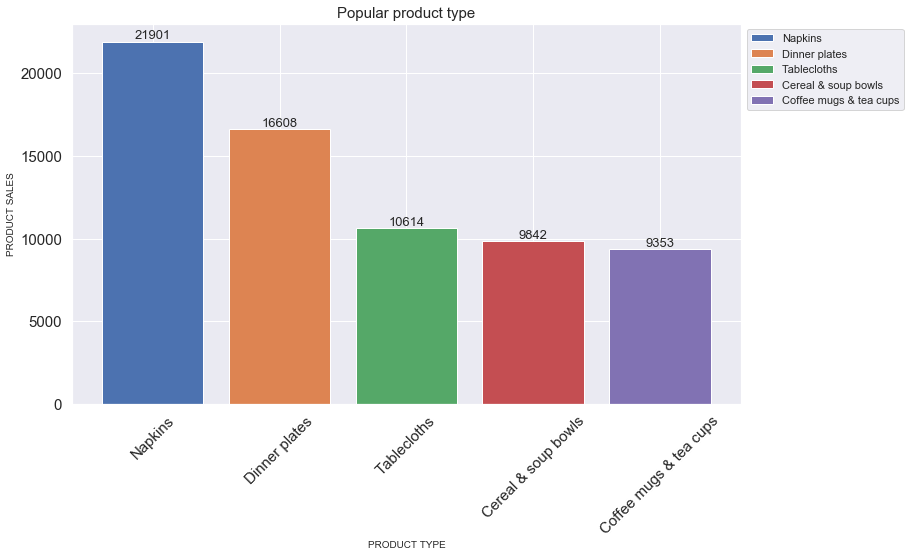

In [391]:
%xmode plain
plt.figure(figsize=(12,7))

bar_width=0.8

for i in range(top):
    plt.bar(x[i],y[i,0],bar_width,label=x[i])
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(rotation = 45, fontsize=15) 
plt.yticks(fontsize=15)
plt.ylabel('PRODUCT SALES',fontsize=10)
plt.xlabel('PRODUCT TYPE',fontsize=10)
plt.title('Popular product type',fontsize=15)
for a,b in zip(x,y):
     plt.text(a,b+0.5,'%.0f'%b,ha='center', va='bottom',fontsize=13)

# plt.contourf()
# plt.colorbar()




# In the'Popular product type' table, we listed **<font color = pink>Top Five Popular Product Type</font>** according to the product's total sale quantity from 2004 to 2020

In [10]:
sql='''select SUM(m.QUANTITY) as SALES, m.BRAND from 
(SELECT b.BRAND as BRAND,floor(a.QUANTITY) as QUANTITY FROM analytics_warehouse_demo.ORDER_ITEM_FACT a 
left join analytics_warehouse_demo.PRODUCT_DIMENSION b on a.PRODUCT_DIM_KEY=b.PRODUCT_DIM_KEY
where a.RESOLUTION_STATUS in ('Completed','Pending') and a.Quantity>=0 and truncate(a.quantity,1)= floor(a.quantity))m
group by m.BRAND
order by SUM(m.QUANTITY) desc'''

brand_quantity=pd.read_sql(sql,con=conn)

In [11]:
brand_quantity_df=pd.DataFrame(brand_quantity,columns=['SALES','BRAND'])


brand_quantity_df=brand_quantity_df.set_index('BRAND')
# print(brand_quantity_df)

top1=5
top_BRAND=brand_quantity_df.head(top1)
top_BRAND

,SALES
BRAND,
Sferra,15899.0
Gracious Style,14727.0
Kassatex,13384.0
Mario Luca Giusti,9525.0
Vietri,9340.0


In [12]:
seaborn.set()

x1=list(top_BRAND.index)
y1=np.array(list(top_BRAND.values))

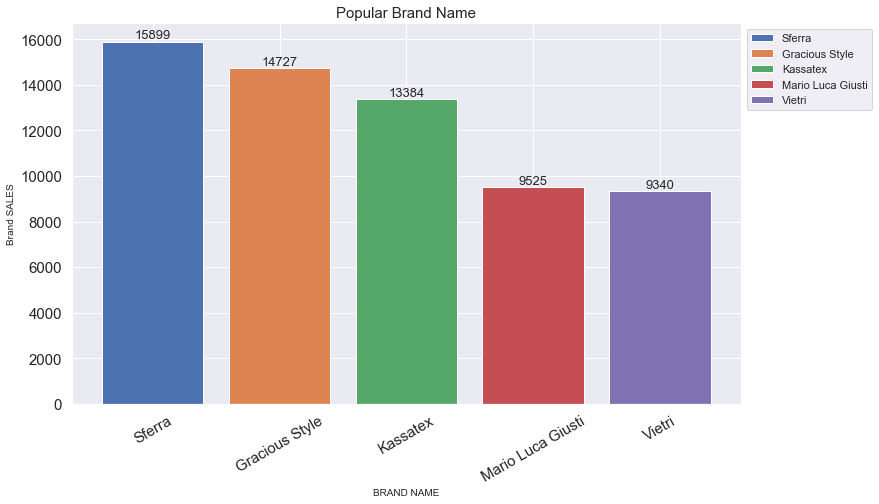

In [14]:
plt.figure(figsize=(12,7))
bar_width=0.8

for i in range(top1):
    plt.bar(x1[i],y1[i,0],bar_width,label=x1[i])
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(rotation = 30, fontsize=15) 
plt.yticks(fontsize=15)
plt.ylabel('Brand SALES',fontsize=10)
plt.xlabel('BRAND NAME',fontsize=10)
plt.title('Popular Brand Name',fontsize=15)
for a,b in zip(x1,y1):
     plt.text(a,b+0.5,'%.0f'%b,ha='center', va='bottom',fontsize=13)


#  We listed **<font color = pink>Top Five Popular Product Brand</font>** according to comparing each brand's the total sale quantity of products belonging to it from 2004 to 2020 in ' Popular Brand Name'

In [228]:
sql='''select s2.product_name as product_name, s2.SaleTotal as sale_quantity ,s2.state as state from sale_each_product s2 where s2.product_name in
(select s1.product_name from sale_each_product s1
left join (
select max(s2.saletotal) as max ,s2.state from sale_each_product s2
group by s2.State
Order by saletotal desc) temp on temp.state=s1.state
where temp.max=s1.saletotal);'''

state_pop=pd.read_sql(sql,con=conn)

In [231]:
# statepop_df=pd.DataFrame(state_pop).set_index('state').rename(columns={'max(tpa.salesNum)':'Sale Quantity','product_name':'Product Name'})

statepop_df=pd.DataFrame(state_pop).rename(columns={'state':'State','sale_quantity':'Sale Quantity','product_name':'Product Name'}) #将state列名改为State


# remove '\n' in the end of each product name
for i in range(statepop_df.index.shape[0]):
    statepop_df.iloc[:,0][i]=statepop_df.iloc[:,0][i].replace('\n','')

    # statepop_df

/Users/apple/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
#将每个州作为列标签，产品名为index
abb=statepop_df.set_index(['Product Name','State'])
# print(abb)
two_index_level=abb['Sale Quantity'] #不然会salequantity列标签与state合并
# print(two_index_level)
new_df=two_index_level.unstack()


new_df.shape



(57, 55)

Exception reporting mode: Plain


Text(368.49999999999994, 0.5, 'Product Name')

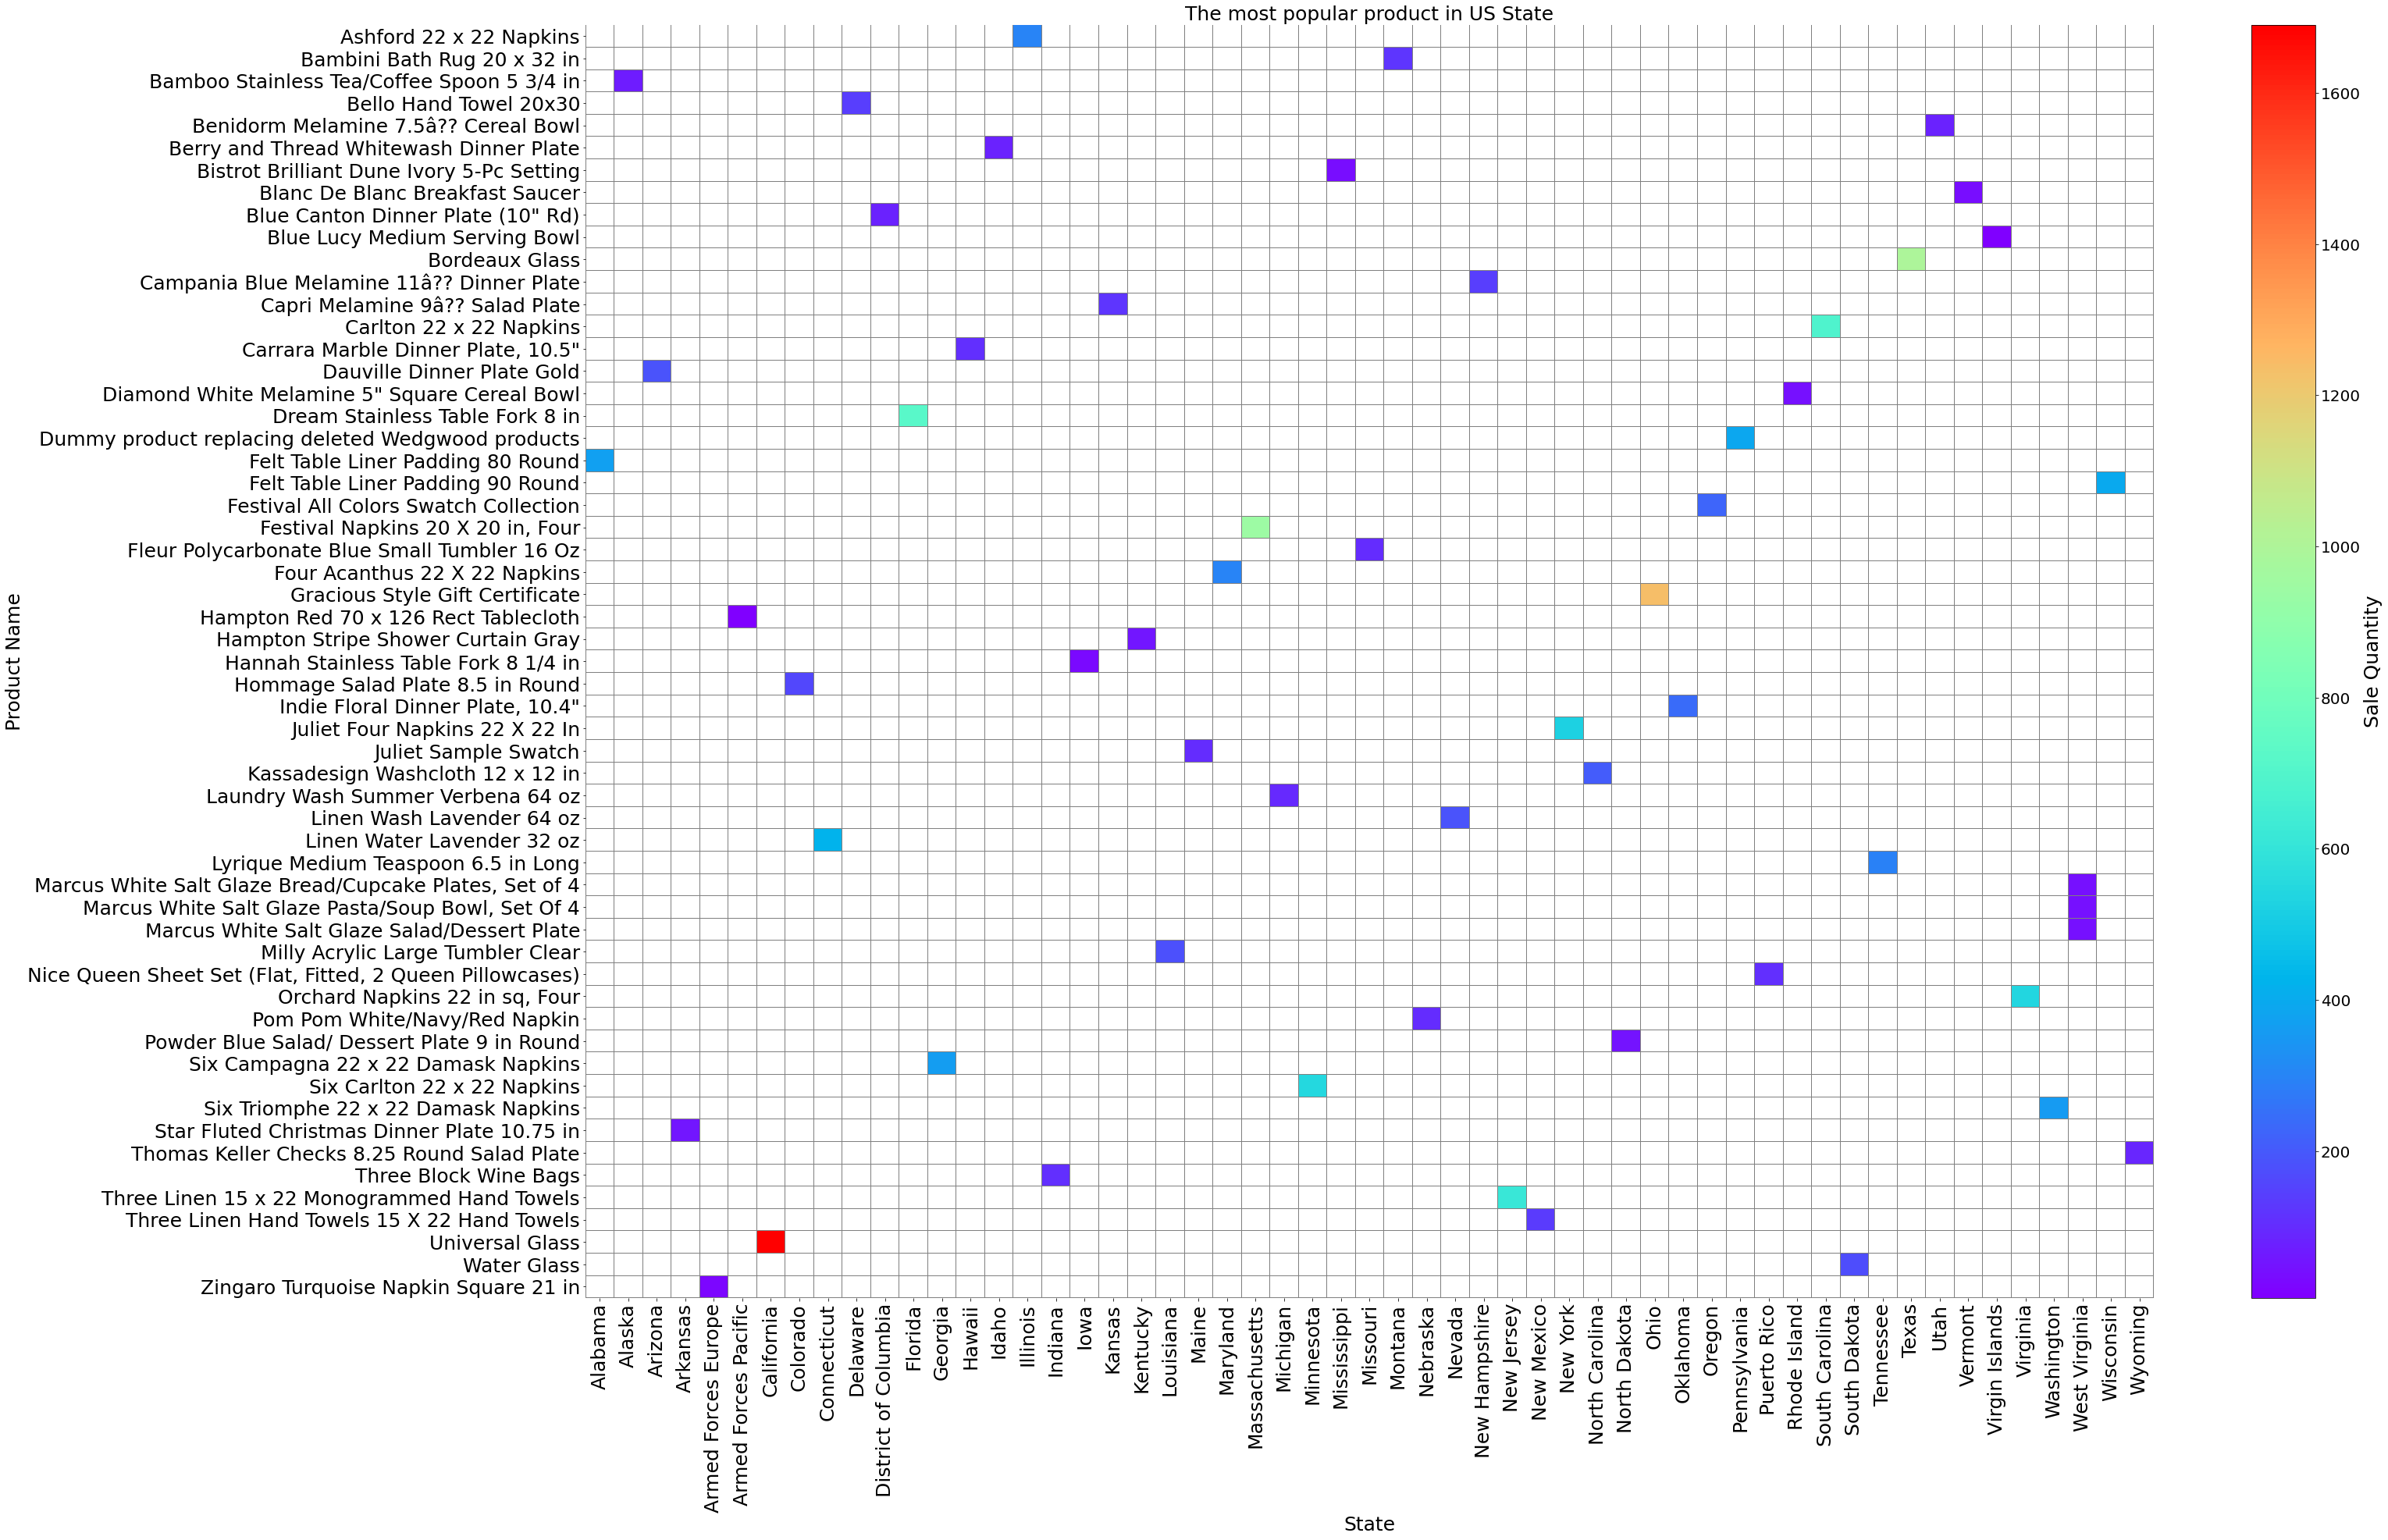

In [190]:
%xmode plain
f,ax1=plt.subplots(figsize=(45,30))
# cmap用matplotlib colormap# rainbow为 matplotlib 的colormap名称

# plt.rc('font',size=25) cmap='rainbow'
h=sns.heatmap(new_df, linewidths =0.01,linecolor='grey', cbar=False,cmap='rainbow') 
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=20)
cb.set_label('Sale Quantity')
ax1.set_title('The most popular product in US State',fontsize=25)
# ax1.tick_params(axis='x',labelsize=25)
# ax1.tick_params(axis='y',labelsize=10)
ax1.set_xlabel('State',fontsize=25)
ax1.set_ylabel('Product Name',fontsize=25)


#  We listed **<font color = pink>The most popular product listed by name in each US state</font>** according to calculating each product's the total sale quantity from 2004 to 2020.
* X-axis are names of states in United States. Y-axis are names of the most popular products in each state. Different colors shown in th charts represent various degrees of customers's purchasing power. Red means the sale quantity of the product is over 1600, purple means the sale quantity of the product is under 200. While there are multiple blank areas, these mean that nobody in the state buy the product corresponding to X-axis.

In [4]:
def read_mysql(sql):
    sql_content=pd.read_sql(sql,con=conn)
    df=pd.DataFrame(sql_content)
    return df


In [120]:
sale_total_quantity=read_mysql('''select sum(saletotal) as Sum_S_Quantity, State from sale_each_product Group by State;''')
st_quantity2=sale_total_quantity.set_index('State').rename(columns={'Sum_S_Quantity':'Sum_Quantity'})

# st_quantity2

In [121]:
st_quantity2.describe()

,Sum_Quantity
count,55.000000
mean,4093.309091
std,7228.643720
min,13.000000
25%,622.000000
50%,1423.000000
75%,4236.500000
max,36142.000000


Exception reporting mode: Plain


/Users/apple/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/apple/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/apple/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/apple/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by Interact

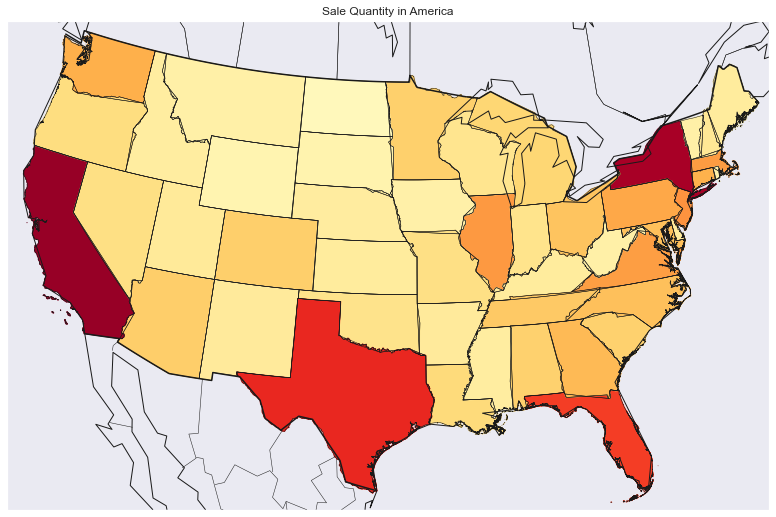

In [122]:
%xmode plain
plt.figure(figsize=(18,9))

 
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()
m.drawstates()

m.readshapefile('gadm36_USA_shp/gadm36_USA_1','states',drawbounds=True)



provinces=m.states_info



statenames=[]
colors={}
cmap=plt.cm.YlOrRd
vmax=40000
vmin=10

plt.title('Sale Quantity in America')

for each_province in provinces:
    province_name=each_province['NAME_1']
    statenames.append(province_name)
    sales=st_quantity2['Sum_Quantity'][province_name]
    colors[province_name]=cmap(np.sqrt((sales-vmin)/(vmax-vmin)))[:3] #map each state data into colormap
    
ax=plt.gca()

for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

# parallels = np.arange(0.,90,10.) 
# m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 绘制纬线
# meridians = np.arange(-110.,-60.,10.)
# m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) #绘制纬线

# lat=np.array(sale_state['Latitude'])
# # print(lat)
# lon=np.array(sale_state['Longitude'])
# sale=np.array(sale_state['Sale Quantity'],dtype=float)

# size=(sale/np.max(sale))*2000   # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果
# x,y = map(lon,lat)
                    
# m.scatter(x,y,s=size)   # 也可以使用Basemap的method本身的scatter



# The map shows **<font color = pink>different degrees of customers' purchasing power in United States</font>** (based on total sale quantity of products sold in each states). 

* The color of California and New York states is crimson, which is darker than other colors of other staes. This means the sale quantity of products in these two states are obviously greater than other states.

In [453]:
brand_rate=read_mysql('''select product_type,sum(o.quantity),p.brand from ORDER_ITEM_FACT o
                        left join PRODUCT_DIMENSION p on o.PRODUCT_DIM_KEY=p.PRODUCT_DIM_KEY
                        where p.brand = (
                        select  m.brand from 
                        (SELECT b.PRODUCT_TYPE,floor(a.QUANTITY) as QUANTITY, b.brand as brand FROM analytics_warehouse_demo.ORDER_ITEM_FACT a 
                        left join analytics_warehouse_demo.PRODUCT_DIMENSION b on a.PRODUCT_DIM_KEY=b.PRODUCT_DIM_KEY
                        where a.RESOLUTION_STATUS in ('Completed','Pending') and a.Quantity>=0 and truncate(a.quantity,1)= floor(a.quantity))m
                        group by m.PRODUCT_TYPE
                        order by SUM(m.QUANTITY) desc
                        limit 1)
                        group by p.product_type;''')

brand_rate2=brand_rate.rename(columns={'product_type':'Type',
                                              'sum(o.quantity)':'Quantity',
                                              'brand':'Brand'})


brand_rate2

,Type,Quantity,Brand
0,"custom tablecloths,tablecloths",592.0,Sferra
1,tablecloths,3643.0,Sferra
2,runners,365.0,Sferra
3,samples,1199.0,Sferra
4,placemats,809.0,Sferra
...,...,...,...
71,pet gifts,4.0,Sferra
72,"duvet covers,christmas",1.0,Sferra
73,"christmas,stockings",2.0,Sferra
74,"stockings,christmas",4.0,Sferra


In [455]:
brand_rate2.index.names=['rank']
brand_rate2

,Type,Quantity,Brand
rank,,,
0,"custom tablecloths,tablecloths",592.0,Sferra
1,tablecloths,3643.0,Sferra
2,runners,365.0,Sferra
3,samples,1199.0,Sferra
4,placemats,809.0,Sferra
...,...,...,...
71,pet gifts,4.0,Sferra
72,"duvet covers,christmas",1.0,Sferra
73,"christmas,stockings",2.0,Sferra


In [436]:
brand_rate2.describe()

,Quantity
count,76.000000
mean,213.069737
std,670.154241
min,0.000000
25%,2.000000
50%,19.500000
75%,114.125000
max,4405.000000


In [437]:
brand_rate2.mean(axis='rows')

Quantity    213.069737
dtype: float64

In [477]:
new_brand_rate=brand_rate2.sort_values(by='Quantity',ascending=False).reset_index(drop=True)

new_brand_rate.index.names=['rank']
new_brand_rate

,Type,Quantity,Brand
rank,,,
0,napkins,4405.0,Sferra
1,tablecloths,3643.0,Sferra
2,samples,1199.0,Sferra
3,cocktail napkins,951.5,Sferra
4,placemats,809.0,Sferra
...,...,...,...
71,"champagne,throws",1.0,Sferra
72,"shams,champagne",1.0,Sferra
73,"christmas,cocktail napkins",0.0,Sferra


In [490]:
x=new_brand_rate.loc[new_brand_rate['Quantity']==0].index
x2=new_brand_rate.drop(x,axis=0)

In [503]:
x2['percentage']=x2['Quantity']/x2['Quantity'].sum()
x2_total_quantity=x2['Quantity'].sum()

In [504]:
x2_total_quantity

16193.3

In [525]:
x3=x2.head(15)
x3

,Type,Quantity,Brand,percentage
rank,,,,
0,napkins,4405.0,Sferra,0.272026
1,tablecloths,3643.0,Sferra,0.224970
2,samples,1199.0,Sferra,0.074043
3,cocktail napkins,951.5,Sferra,0.058759
4,placemats,809.0,Sferra,0.049959
5,"custom tablecloths,tablecloths",592.0,Sferra,0.036558
6,pillow cases,464.0,Sferra,0.028654
7,shams,439.0,Sferra,0.027110
8,runners,365.0,Sferra,0.022540


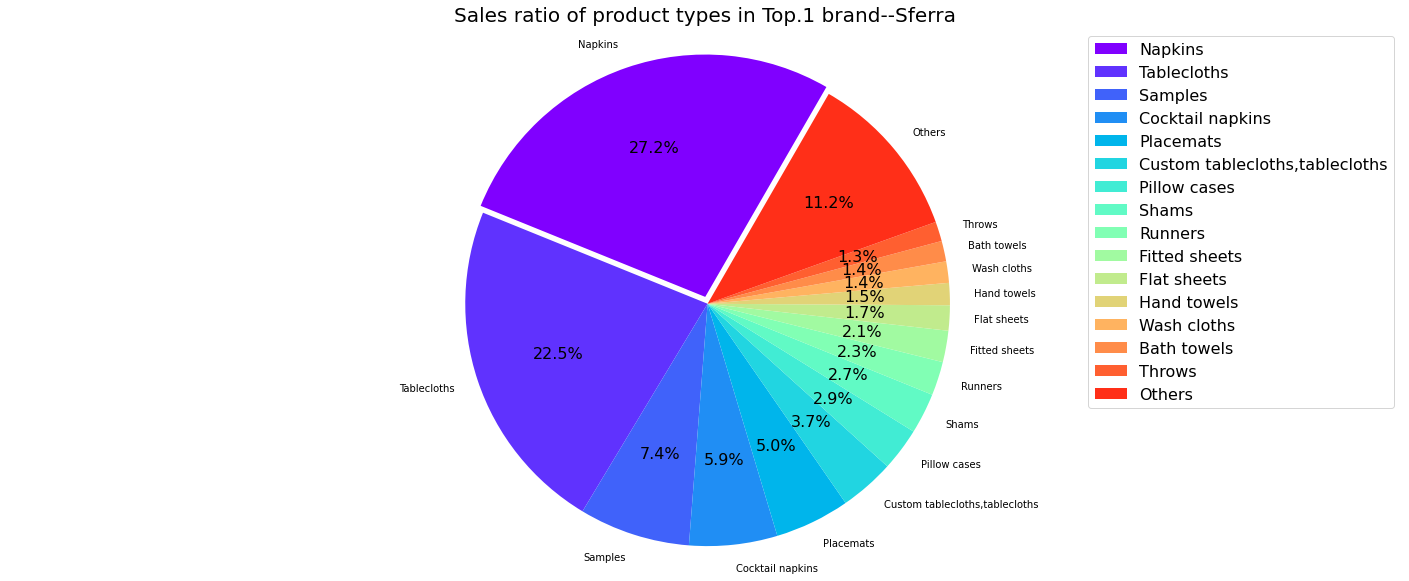

In [576]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(25,10))
size=list(x3['Quantity'])
other_size=x2_total_quantity-x3['Quantity'].sum()
size.append(other_size)
labels=list(x3['Type'].str.capitalize())
labels.append('Others')
explode = (0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 

colors = cm.rainbow(np.arange(len(size))/len(size))

patches,l_text,p_text=plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=False,startangle=60,pctdistance=0.65)
#颜色也可以不设置，会有默认颜色,l_text是为了得到饼图返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
for t in l_text:
    t.set_size(10)
for t in p_text:
    t.set_size(16)
plt.axis('equal') #设置横轴和纵轴大小相等，这样饼才是圆的
plt.title("Sales ratio of product types in Top.1 brand--Sferra",fontsize=20,loc='center')
plt.legend(fontsize=16)

# From 'Popular brand name' chart above, it is obvious that Sferra is the most popular brand. Based on this, we analyse  **<font color = pink>each product type's sale ratio of Sferra and show in the pie chart.</font>**

* It is clear that  the total sale quantity of napkins, tablecloths and samples these three product types makes up more than 50%.

In [2]:
input=pd.read_csv('out.csv')
input

,Unnamed: 0,DATE_DIM_KEY,YEAR,MONTH,MONTH_NAME,DAY,DAY_OF_WEEK,DAY_NAME,DAY_OF_YEAR,WEEK_OF_YEAR,customer_dim_key,product_dim_key,quantity,product_type,brand,color,category,product_name
0,0,17178,2017,1,January,11,4,Wednesday,11,2,60189,128674,2.0,"blankets,shams",Pine Cone Hill,Unknown,MONTANA-BLANKET,Montana blanket sham european
1,1,17178,2017,1,January,11,4,Wednesday,11,2,60189,128673,1.0,blankets,Pine Cone Hill,Unknown,MONTANA-BLANKET,Montana blanket full/queen
2,2,17178,2017,1,January,11,4,Wednesday,11,2,57104,336148,1.0,bread & butter plates,Michael Aram,Unknown,MICHAEL-ARAM,Sago Palm Bread Plate Gold
3,3,17177,2017,1,January,10,3,Tuesday,10,2,60157,181252,1.0,bread & butter plates,Rosenthal,Unknown,TABLE-SETTINGS-YELLO,Butterfly Garden Bread & Butter Plate 7 inch
4,4,17177,2017,1,January,10,3,Tuesday,10,2,60157,180079,1.0,canape plates,Rosenthal,Unknown,CHIP-AND-DIP,"Butterfly Garden Canape Dish, Porcelain 4 3/4 ..."
5,5,17176,2017,1,January,9,2,Monday,9,2,46514,133328,1.0,caviar,Ercuis,Unknown,CAVIAR-SETS,Transat Silver Plated Caviar Set
6,6,17176,2017,1,January,9,2,Monday,9,2,46514,133326,1.0,caviar,Ercuis,Unknown,CAVIAR-SETS,Nura Caviar Bowl with Applied Border
7,7,17176,2017,1,January,9,2,Monday,9,2,60177,398086,1.0,soap dishes,Pigeon & Poodle,Unknown,Unknown,Verum Shiny Nickel Soap Dish Rectangular Taper...
8,8,17174,2017,1,January,7,7,Saturday,7,1,60196,364688,0.0,tablecloths,Sferra,White,Unknown,Squire Rect Tablecloth 70x90 in
9,9,17174,2017,1,January,7,7,Saturday,7,1,60196,105537,1.0,napkins,Sferra,White,FESTIVAL-TABLE,"Festival Napkins 20 X 20 in, Four"


In [5]:
input['product_type'].fillna('missing_product_type',inplace=True)
input['brand'].fillna('missing_brand',inplace=True)
input['color'].fillna('missing_color',inplace=True)
input['category'].fillna('missing_category',inplace=True)
input['product_name'].fillna('missing_name',inplace=True)

In [6]:
input.isnull().any()

Unnamed: 0          False
DATE_DIM_KEY        False
YEAR                False
MONTH               False
MONTH_NAME          False
DAY                 False
DAY_OF_WEEK         False
DAY_NAME            False
DAY_OF_YEAR         False
WEEK_OF_YEAR        False
customer_dim_key    False
product_dim_key     False
quantity            False
product_type        False
brand               False
color               False
category            False
product_name        False
dtype: bool

In [42]:
# sale_timedf.pivot_table('quantity',index='YEAR',columns='product_type',aggfunc='sum')
# sns.set()
# plt.figure(figsize=(25,10))
# sale_timedf.pivot_table('quantity',index='YEAR',columns='product_type',aggfunc='sum').plot()
# plt.ylabel('sale quantity')

In [43]:
# b2.describe()

In [44]:
# sale_timedf.pivot_table('quantity',index='YEAR',columns='product_type',aggfunc='sum')
# # plot图时，x轴为index-year,y-quantity, columns为label-product_type

Text(0, 0.5, 'Quantity by year')

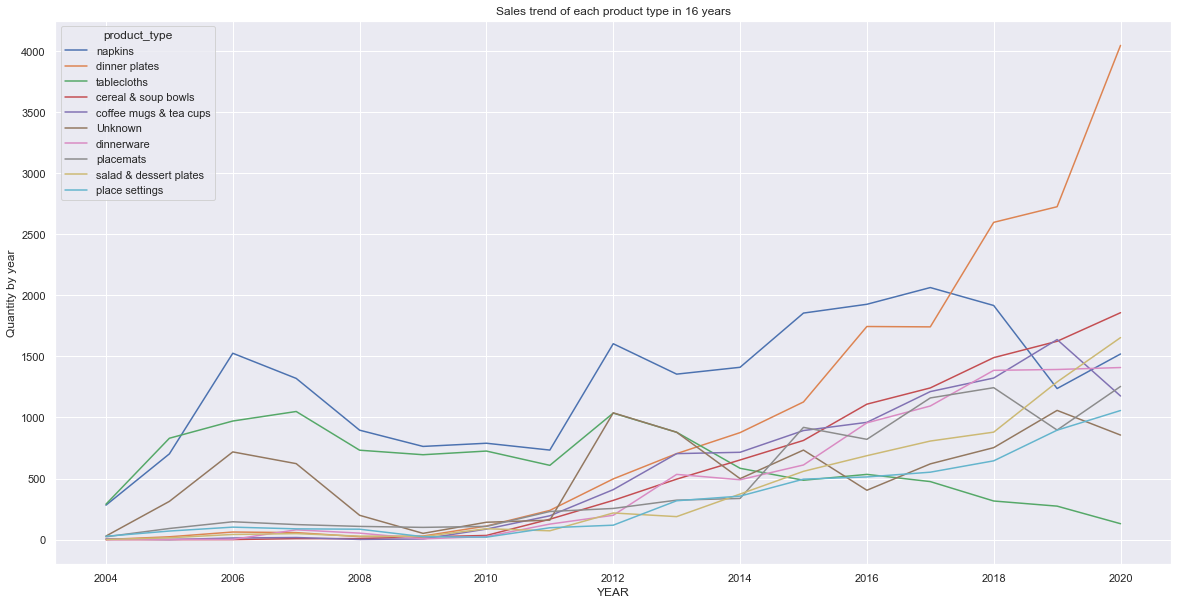

In [9]:
df=input.groupby(['product_type','YEAR'])['quantity'].sum().unstack()

s_df=pd.DataFrame(df)
#s_df.rename_axis(columns=None,inplace=True)
s_df['total']=s_df.sum(axis=1)
s_df1=s_df.sort_values(by='total',ascending=False).fillna(0)
s_df2=s_df1.iloc[:10,:17]
s_df3=s_df2.unstack().unstack()
sns.set()
s_df4=s_df3.plot(figsize=(20,10),title='Sales trend of each product type in 16 years')
s_df4.set_ylabel('Quantity by year')


# <font color=grey> The order of product types in legend in the upper left of chart shows the ranking of each product total sale quatity from 2004 to 2020.
# <font color=grey> From the line trend, we can clearly get that the sale of dinner plates had rapid growth after 2010. Except napkins and tablecloths, the other eight product types' sales generally had increase over 16 years. While the sale of tablecloths fluctuated and decreased after 2016. The sale quantity of napkins also fluctuated obviously, but from 2019 to 2020, its increased.</font>

In [10]:
top_n=2 #to view the nth top product type sale condition 
year=2018 # view the nth top product type sale condition in which year
top_list=list(s_df1.head(10).index) 

In [12]:
df_eachproduct=input.groupby(['product_type','YEAR','MONTH','DAY'])['quantity'].sum()
idx=pd.IndexSlice
df_eachproduct1=df_eachproduct.to_frame().loc[top_list[top_n],idx[year],:]
df_eachproduct1

quantity
product_type YEAR MONTH DAY          
tablecloths  2018 1     2         1.0
                        8         1.0
                        9         2.0
                        11        1.0
                        12        3.0
...                               ...
                  12    12        1.0
                        13        2.0
                        16        1.0
                        17        1.0
                        27        0.0

[164 rows x 1 columns]

In [13]:
df_eachproduct1.index.get_level_values(3) 

Int64Index([ 2,  8,  9, 11, 12, 14, 15, 18, 22, 23,
            ...
             5,  6,  7,  8,  9, 12, 13, 16, 17, 27],
           dtype='int64', name='DAY', length=164)

In [14]:
df_eachproduct1.index.map('{0[1]}/{0[2]}/{0[3]}'.format) #index level 1 is the same,then merge level 2,level 3,level 4

Index(['2018/1/2', '2018/1/8', '2018/1/9', '2018/1/11', '2018/1/12',
       '2018/1/14', '2018/1/15', '2018/1/18', '2018/1/22', '2018/1/23',
       ...
       '2018/12/5', '2018/12/6', '2018/12/7', '2018/12/8', '2018/12/9',
       '2018/12/12', '2018/12/13', '2018/12/16', '2018/12/17', '2018/12/27'],
      dtype='object', length=164)

In [15]:
df_eachproduct1.index = [df_eachproduct1.index.get_level_values(0),df_eachproduct1.index.map('{0[1]}/{0[2]}/{0[3]}'.format)] 

In [16]:
df_eachproduct1.index.names=['product','time']

In [17]:
x=df_eachproduct1.index.get_level_values(1)
y=df_eachproduct1.values
x_list=list(x)
#x_list

In [18]:
from datetime import date
import holidays

# Select country
us_holidays = holidays.US()

# # If it is a holidays then it returns True else False
# print('31-10-2019' in us_holidays)
# print('2019/1/12' in us_holidays)
# # What holidays is it?
# print(us_holidays.get('31-10-2019'))
# print(us_holidays.get('02-01-2018'))

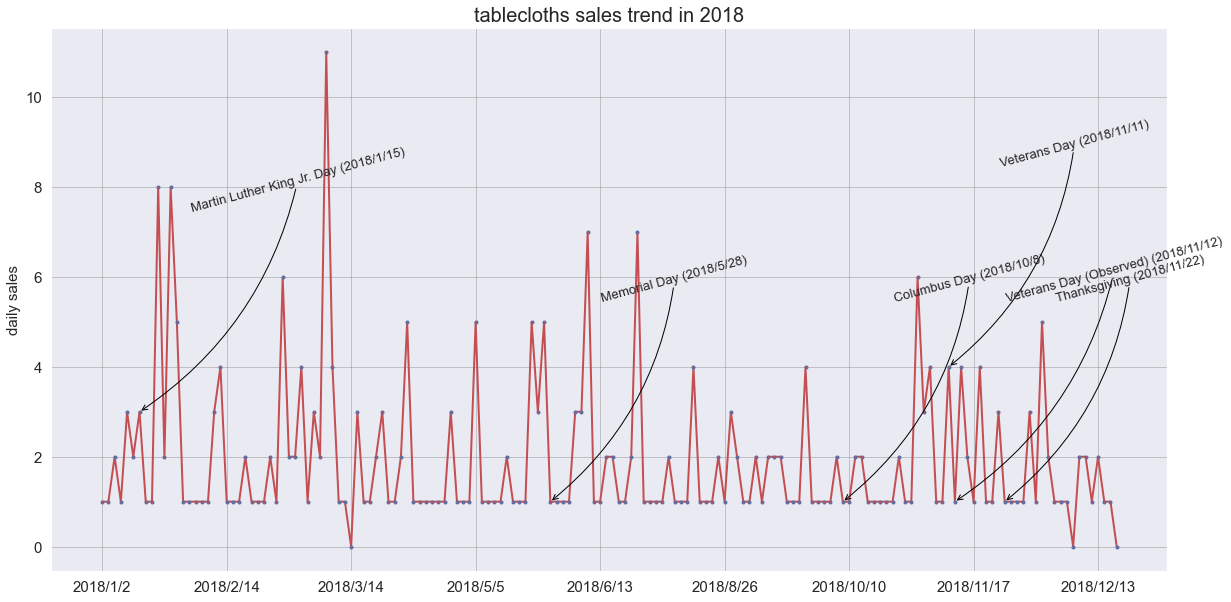

In [19]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,c='r',ls='-',lw=2,marker='o',mec='b',ms=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20)) #set aixs intervals,let xticks value not too filled
ax.grid(linestyle = '-',linewidth =1, color= 'gray',alpha = 0.4) 
# ax.patch.set_facecolor("")  
ax.set_title(top_list[top_n]+' sales trend in '+ str(year),fontsize=20)
ax.set_ylabel('daily sales',fontsize=15)
ax.tick_params(labelsize=15)
style = dict(size=15, color='black')


for i in x_list:
    if i in us_holidays:
#         ax.text(i, list(y)[x_list.index(i)], us_holidays.get(i), **style) 
        ax.annotate(us_holidays.get(i)+' ('+i+')',xy=(i,list(y)[x_list.index(i)]),xycoords='data',xytext=(50,200),rotation=15,size=13,
                    textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2",color='black'),
                    bbox=dict(pad=0, facecolor="none", edgecolor="none"))

# ax.text(str(year)+'/1/1', y, "New Year's Day", **style) 
# ax.text('2019/7/4', 4250, "Independence Day", ha='center', **style) 
# ax.text('2019/9/4', 4850, "Labor Day", ha='center', **style) 
# ax.text('2019/10/31', 4600, "Halloween", ha='right', **style) 
# ax.text('2019/11/25', 4450, "Thanksgiving", ha='center', **style) 
# ax.text('2019/12/25', 3850, "Christmas ", ha='right', **style)

# <font color=pink> The chart above shows each top n product type's sale details in one year and  also sales status in holidays is ticked in the graph</font>
* choose which year and which product type to view at: <br>
                            top_n= 
                            year=

In [6]:
sale_databyweek=input.groupby(['product_type','DAY_OF_WEEK'])['quantity'].sum()

In [129]:
s1=sale_databyweek.to_frame()
top_sale_list=s1.groupby('product_type').agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False).head(10).index

list(top_sale_list)



['napkins',
 'dinner plates',
 'tablecloths',
 'cereal & soup bowls',
 'coffee mugs & tea cups',
 'Unknown',
 'dinnerware',
 'placemats',
 'salad & dessert plates',
 'place settings']

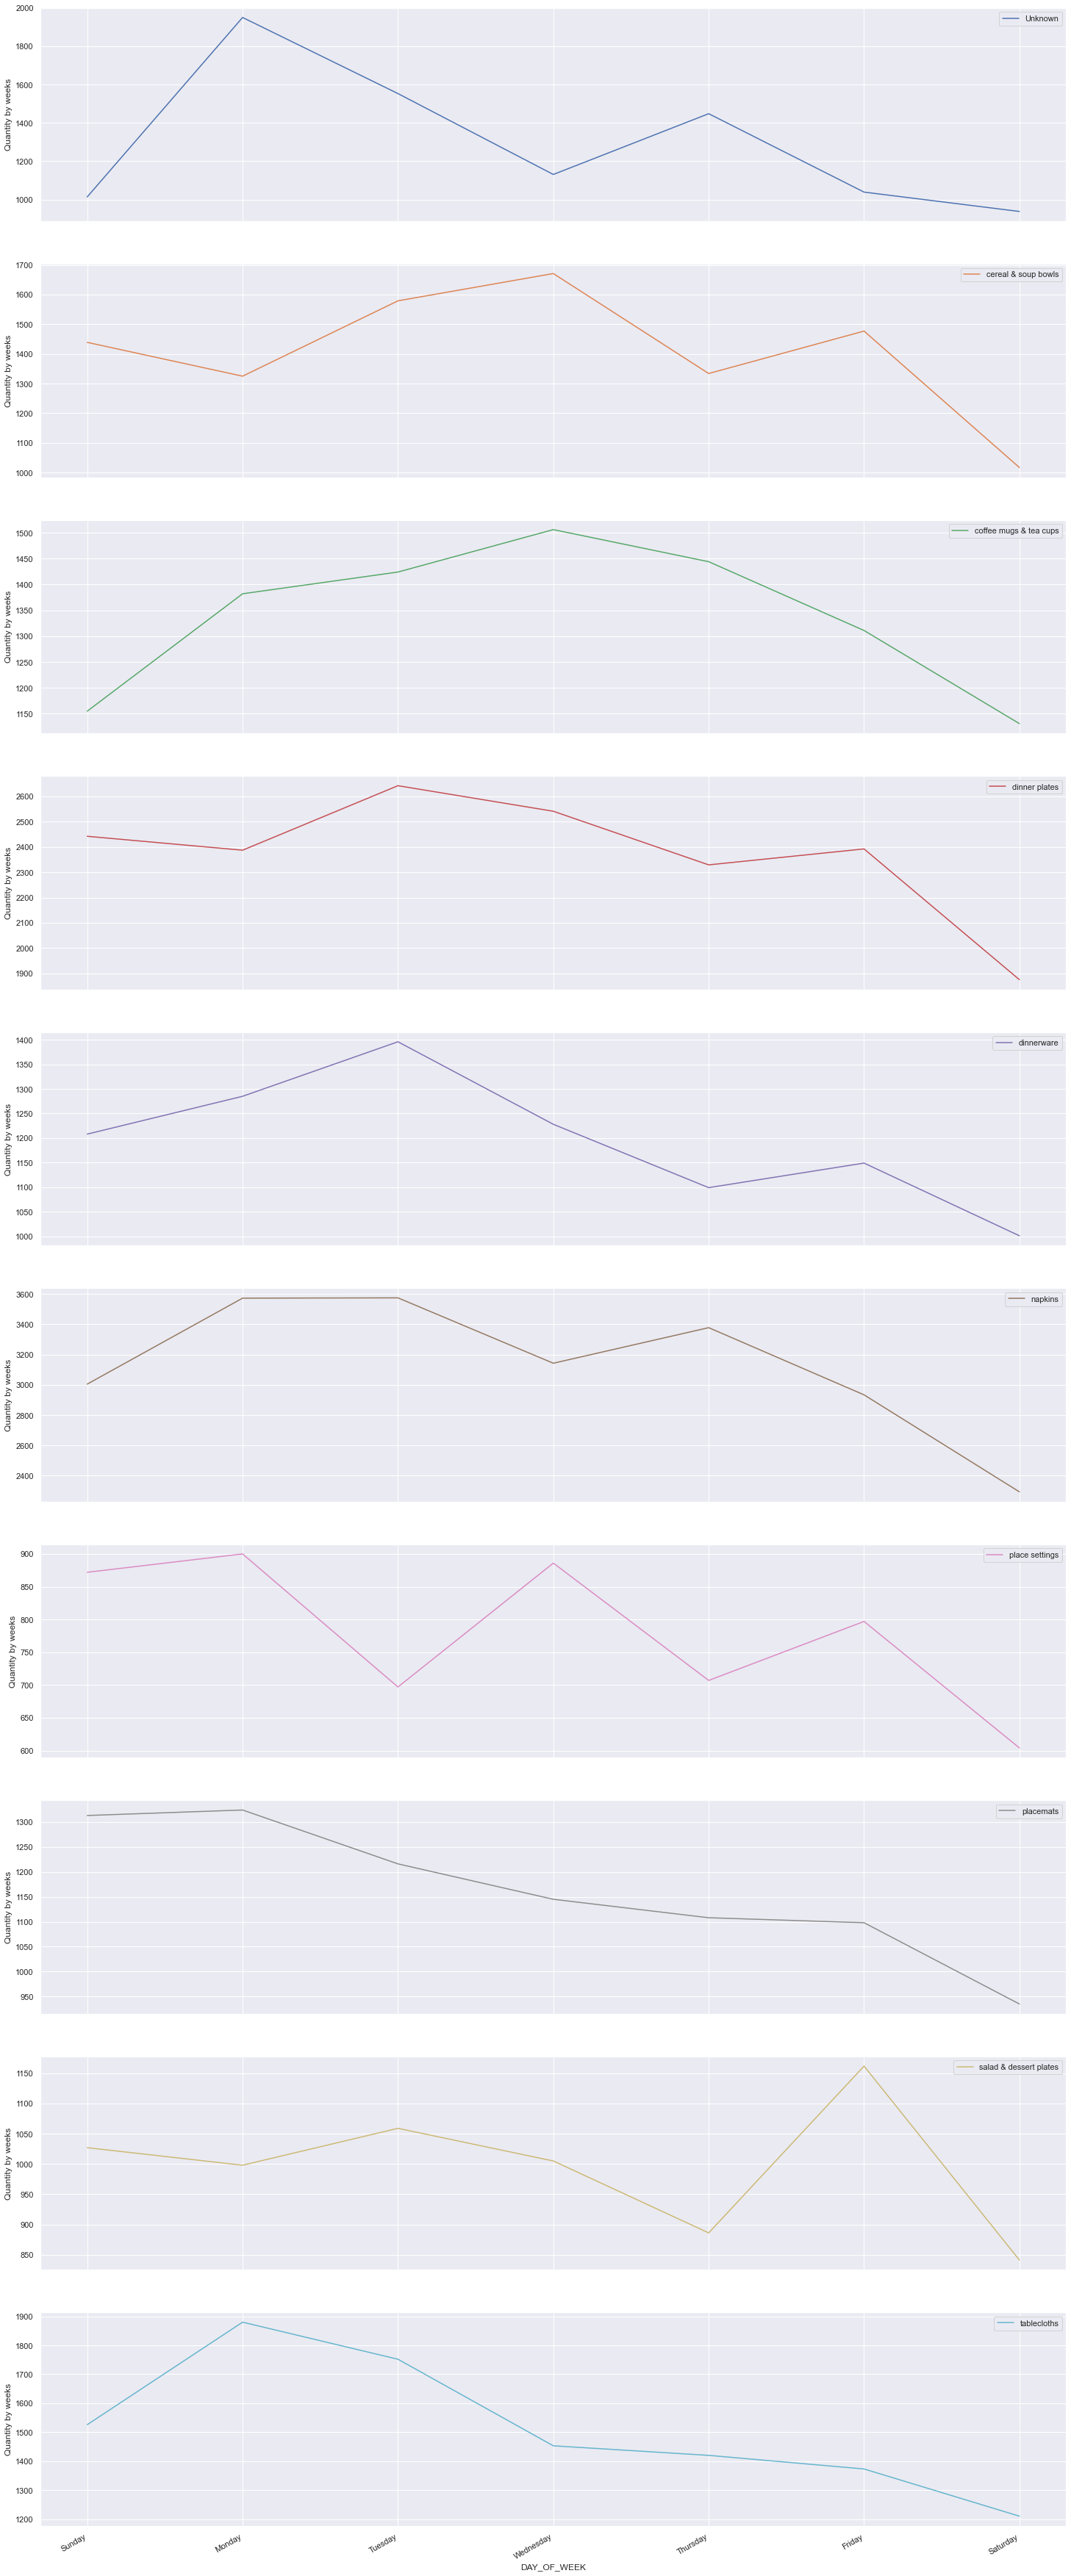

In [131]:
s2=sale_databyweek[sale_databyweek.index.get_level_values('product_type').isin(list(top_sale_list))]
sns.set()

plots=s2.unstack(level=0).plot(figsize=(25,70),subplots=True)

for p in plots:
    p.set_xticklabels(['','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
    p.set_ylabel('Quantity by weeks')

max_indx=np.argmax(plots[0].lines[0].get_ydata())#max value index
min_indx=np.argmin(plots[0].lines[0].get_ydata())#min value index

plots[0].plot(plots[0].lines[0].get_xdata()[max_indx],plots[0].lines[0].get_ydata()[max_indx],\
              color='black',markersize=20)

# print(plots[0].lines[0].get_xdata()[max_indx])
# print(plots[0].lines[0].get_ydata()[max_indx])

# <font color=pink> The ten charts represent the sale trend by weeks for product types of top ten total sale quantity over 16 years. </font>
* They all have one common thing that the sale quantities in Saturaday were the lowest among in other weeks.

In [21]:
df_product_recent=input.groupby(['YEAR','MONTH','product_type'])['quantity'].sum()
idx=pd.IndexSlice
df_eachproduct_recent = df_product_recent.to_frame().loc[idx[2019,2020],:,top_list,:]


df_eachproduct_recent.index =[df_eachproduct_recent.index.map('{0[0]}/{0[1]}'.format),df_eachproduct_recent.index.get_level_values(2)] 
df_eachproduct_recent.index.names=['Time','Product']
# df_eachproduct_recent
   
# top_list
x_data=['2019/3','2019/4','2019/5','2019/6','2019/11','2019/12','2020/1','2020/2','2020/3','2020/4','2020/5','2020/6']
df_eachproduct_recentcovid=df_eachproduct_recent.loc[idx[x_data],top_list,:]

In [29]:
df3=df_eachproduct_recentcovid.loc[idx[x_data],top_list,:].unstack()

In [30]:
df3.columns= df3.columns.droplevel(0)

In [31]:
df3.columns

Index(['Unknown', 'cereal & soup bowls', 'coffee mugs & tea cups',
       'dinner plates', 'dinnerware', 'napkins', 'place settings', 'placemats',
       'salad & dessert plates', 'tablecloths'],
      dtype='object', name='Product')

Text(0, 0.5, 'Sales')

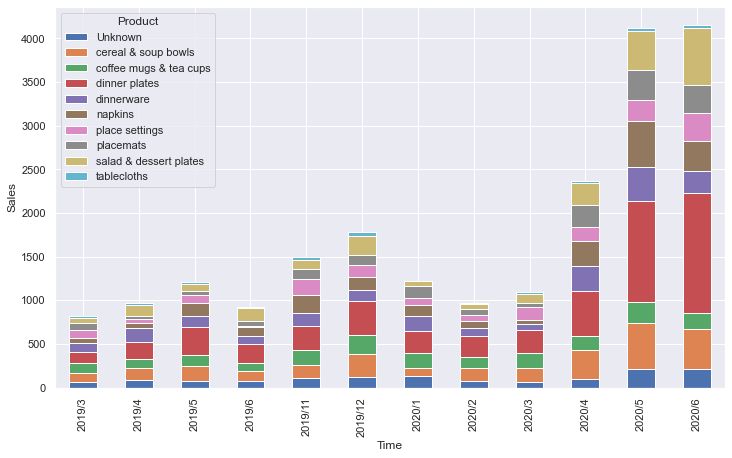

In [33]:
df3.plot(kind='bar',stacked=True,figsize=(12,7))
plt.ylabel("Sales")

The chart above shows the sales status for top 10 popular product type during the coronavirus period (2020.03-2020.06), compared with sales quantity of the first four months before covid happening and the same period in 2019. 

There is an amazing phenomena that the covid virus did not affect the sales of these 10 product types, while dinner plate's, cereal& soup bowls' and salad & dessert plates' sales had increased significantly over the covid period.

## Next ,analyse each customer purchase habits with association rules.

In [9]:
# idx=pd.IndexSlice
input2=input[['customer_dim_key','product_name']]
input_product=input2.set_index('customer_dim_key')

In [10]:
input_product

,product_name,quantity
customer_dim_key,,
60189,Montana blanket sham european,2.0
60189,Montana blanket full/queen,1.0
57104,Sago Palm Bread Plate Gold,1.0
60157,Butterfly Garden Bread & Butter Plate 7 inch,1.0
60157,"Butterfly Garden Canape Dish, Porcelain 4 3/4 ...",1.0
46514,Transat Silver Plated Caviar Set,1.0
46514,Nura Caviar Bowl with Applied Border,1.0
60177,Verum Shiny Nickel Soap Dish Rectangular Taper...,1.0
60196,Squire Rect Tablecloth 70x90 in,0.0


In [9]:
for i in range(input_product.shape[0]):
    input_product.iloc[i][0]=input_product.iloc[i][0].replace('\n','')
    

In [10]:
input_product

,product_name
customer_dim_key,
60189,Montana blanket sham european
60189,Montana blanket full/queen
57104,Sago Palm Bread Plate Gold
60157,Butterfly Garden Bread & Butter Plate 7 inch
60157,"Butterfly Garden Canape Dish, Porcelain 4 3/4 ..."
46514,Transat Silver Plated Caviar Set
46514,Nura Caviar Bowl with Applied Border
60177,Verum Shiny Nickel Soap Dish Rectangular Taper...
60196,Squire Rect Tablecloth 70x90 in


In [257]:
input_product.loc[60170].values

array(['Drop Champagne Flute, Box/6 7 Oz'], dtype=object)

In [263]:
from collections import defaultdict

data_product=defaultdict(lambda:set())


# #customer_key[1]
for i in input_product.index:
    for name in input_product.loc[i].values:
        if type(name)==str:
            data_product[i].add(name)
        else:
            data_product[i].add(name[0])
     

In [271]:
d2 = []
for key, s in data_product.items():
    d2.append((key, "| ".join(s)))
    
d3=pd.DataFrame(d2)

In [281]:
d3.values[:,1]

array(['Montana blanket sham european| Montana blanket full/queen',
       'Country Estate Delft Blue 18.5 in Serving Platter Main House| Sago Palm Bread Plate Gold',
       'Butterfly Garden Canape Dish, Porcelain 4 3/4 inch, Square| Butterfly Garden Bread & Butter Plate 7 inch',
       ..., 'Universal Glass', 'Cruise Stripe Coral Woven Cotton Rug 2x3',
       'Provencal Fleur De Lis Double Old Fashioned Glass'], dtype=object)

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [4]:
# idx=pd.IndexSlice
input2=input[['customer_dim_key','product_name','quantity']]
# input_product=input2.set_index('customer_dim_key')
# input_product
input2

,customer_dim_key,product_name,quantity
0,60189,Montana blanket sham european,2.0
1,60189,Montana blanket full/queen,1.0
2,57104,Sago Palm Bread Plate Gold,1.0
3,60157,Butterfly Garden Bread & Butter Plate 7 inch,1.0
4,60157,"Butterfly Garden Canape Dish, Porcelain 4 3/4 ...",1.0
5,46514,Transat Silver Plated Caviar Set,1.0
6,46514,Nura Caviar Bowl with Applied Border,1.0
7,60177,Verum Shiny Nickel Soap Dish Rectangular Taper...,1.0
8,60196,Squire Rect Tablecloth 70x90 in,0.0
9,60196,"Festival Napkins 20 X 20 in, Four",1.0


In [5]:
baseket=input2.groupby(['customer_dim_key','product_name'])['quantity'].sum().unstack().fillna(0)

def encode_unit(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
    
baseket_sets=baseket.applymap(encode_unit)
# baseket_sets

frequent_itemset=apriori(baseket_sets,min_support=0.001,use_colnames=True)
rules=association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Campagna Sample Swatch),(Ashford Sample Swatch),0.002606,0.002628,0.001392,0.533898,203.123629,0.001385,2.139815
1,(Ashford Sample Swatch),(Campagna Sample Swatch),0.002628,0.002606,0.001392,0.529412,203.123629,0.001385,2.119462
2,(Bordeaux Glass),(Burgundy Glass),0.006361,0.005124,0.001436,0.225694,44.043493,0.001403,1.284862
3,(Burgundy Glass),(Bordeaux Glass),0.005124,0.006361,0.001436,0.280172,44.043493,0.001403,1.380384
4,(Bordeaux Glass),(Universal Glass),0.006361,0.008747,0.001060,0.166667,19.054714,0.001005,1.189504
5,(Universal Glass),(Bordeaux Glass),0.008747,0.006361,0.001060,0.121212,19.054714,0.001005,1.130692
6,(Universal Glass),(Burgundy Glass),0.008747,0.005124,0.001082,0.123737,24.146922,0.001037,1.135362
7,(Burgundy Glass),(Universal Glass),0.005124,0.008747,0.001082,0.211207,24.146922,0.001037,1.256671
8,(Carlton Sample Swatch),(Classico Sample Swatch),0.002518,0.005146,0.001325,0.526316,102.267902,0.001312,2.100246
9,(Classico Sample Swatch),(Carlton Sample Swatch),0.005146,0.002518,0.001325,0.257511,102.267902,0.001312,1.343430


NameError: name 'apriori' is not defined